In [ ]:
# DPO plotted

: 

/var/folders/b_/l_rcmwq56dq2902h_83wm9t80000gn/T/ipykernel_82794/3899664489.py:26: RuntimeWarning: divide by zero encountered in log
  reward_l = beta * np.log(pi_theta_l / pi_ref_l)


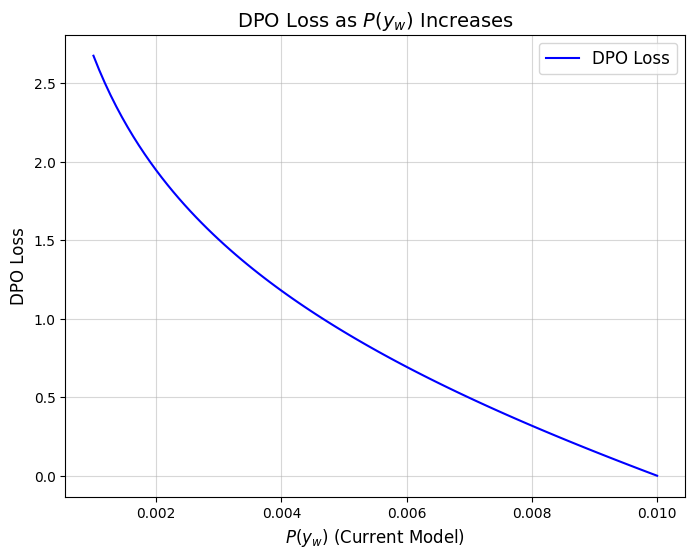

In [12]:
import numpy as np

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the DPO loss components
def dpo_loss(pi_theta_w, pi_theta_l, pi_ref_w, pi_ref_l, beta=1.0):
    """
    Compute the DPO loss given probabilities and scaling factor beta.
    
    Parameters:
    - pi_theta_w: P(y_w | x) from the current model (float or array-like)
    - pi_theta_l: P(y_l | x) from the current model (float or array-like)
    - pi_ref_w: P(y_w | x) from the reference model (float or array-like)
    - pi_ref_l: P(y_l | x) from the reference model (float or array-like)
    - beta: Scaling factor (default = 1.0)
    
    Returns:
    - Loss value (float or array-like)
    """
    # Term (3): Reward for preferred output
    reward_w = beta * np.log(pi_theta_w / pi_ref_w)
    
    # Term (4): Reward for dispreferred output
    reward_l = beta * np.log(pi_theta_l / pi_ref_l)
    
    # Term (2): Sigmoid of the reward difference
    sigmoid_term = sigmoid(reward_w - reward_l)
    
    # Term (1): Negative log of the sigmoid term
    loss = -np.log(sigmoid_term)
    
    return loss

# Example input values
pi_theta_w = np.linspace(0.001, 0.01, 100)  # P(y_w | x) from the current model
pi_theta_l = .01 - pi_theta_w                # P(y_l | x) from the current model
pi_ref_w = 0.006                             # P(y_w | x) from the reference model (constant for simplicity)
pi_ref_l = 0.004                             # P(y_l | x) from the reference model (constant for simplicity)
beta = 1.0                                 # Scaling factor

# Compute the DPO loss
loss_values = dpo_loss(pi_theta_w, pi_theta_l, pi_ref_w, pi_ref_l, beta=beta)

# Plotting the loss
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(pi_theta_w, loss_values, label='DPO Loss', color='blue')
plt.title("DPO Loss as $P(y_w)$ Increases", fontsize=14)
plt.xlabel("$P(y_w)$ (Current Model)", fontsize=12)
plt.ylabel("DPO Loss", fontsize=12)
plt.grid(alpha=0.5)
plt.legend(fontsize=12)
plt.show()


In [8]:
import numpy as np 

logits = np.linspace(-3, +3, 11)
# run logistic function on the logits
probs = 1 / (1 + np.exp(-logits))
odds = np.exp(logits)

# print out the values in a nice table
print("logit\t| sigmoid(x) [prob]\t| exp(x) [odds]")
print("-" * 30)
for i in range(len(logits)):
    print(f"{logits[i]:.4f}\t| {probs[i]:.4f}\t\t| {odds[i]:.4f}")


logit	| sigmoid(x) [prob]	| exp(x) [odds]
------------------------------
-3.0000	| 0.0474		| 0.0498
-2.4000	| 0.0832		| 0.0907
-1.8000	| 0.1419		| 0.1653
-1.2000	| 0.2315		| 0.3012
-0.6000	| 0.3543		| 0.5488
0.0000	| 0.5000		| 1.0000
0.6000	| 0.6457		| 1.8221
1.2000	| 0.7685		| 3.3201
1.8000	| 0.8581		| 6.0496
2.4000	| 0.9168		| 11.0232
3.0000	| 0.9526		| 20.0855


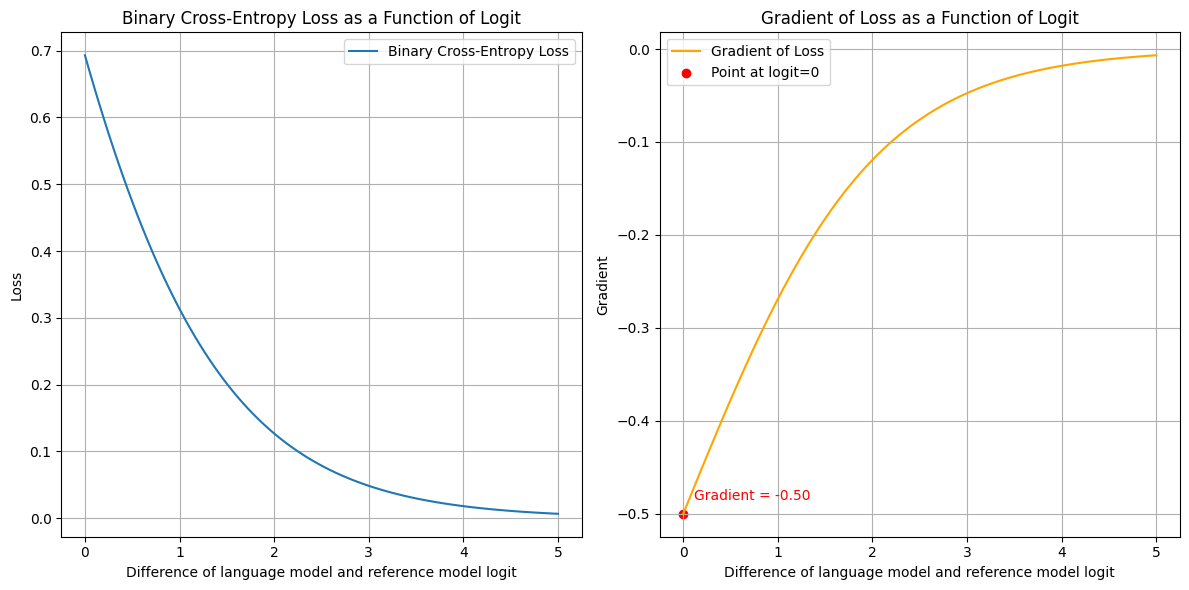

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define the loss function (binary cross-entropy) and its gradient
def binary_cross_entropy_loss(logit):
    # Convert logit to probability using sigmoid
    prob = 1 / (1 + np.exp(-logit))
    # Binary cross-entropy loss for the positive class (target = 1)
    return -np.log(prob)

def gradient_of_loss(logit):
    # Gradient of binary cross-entropy w.r.t. the logit
    prob = 1 / (1 + np.exp(-logit))
    return prob - 1  # derivative of BCE loss when target = 1

# Generate logits from 0 to 5.0
logits = np.linspace(0, 5, 100)

# Compute loss and gradient
losses = binary_cross_entropy_loss(logits)
gradients = gradient_of_loss(logits)



# Define a specific logit value to annotate
annotate_logit = 0
annotate_gradient = gradient_of_loss(annotate_logit)

# Plot the loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(logits, losses, label="Binary Cross-Entropy Loss")
plt.title("Binary Cross-Entropy Loss as a Function of Logit")
plt.xlabel("Difference of language model and reference model logit")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

# Plot the gradient
plt.subplot(1, 2, 2)
plt.plot(logits, gradients, label="Gradient of Loss", color="orange")
plt.scatter([annotate_logit], [annotate_gradient], color="red", label=f"Point at logit={annotate_logit}")
plt.annotate(f"Gradient = {annotate_gradient:.2f}",
             (annotate_logit, annotate_gradient),
             textcoords="offset points", xytext=(50, 10), ha="center", color="red")
plt.title("Gradient of Loss as a Function of Logit")
plt.xlabel("Difference of language model and reference model logit")
plt.ylabel("Gradient")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


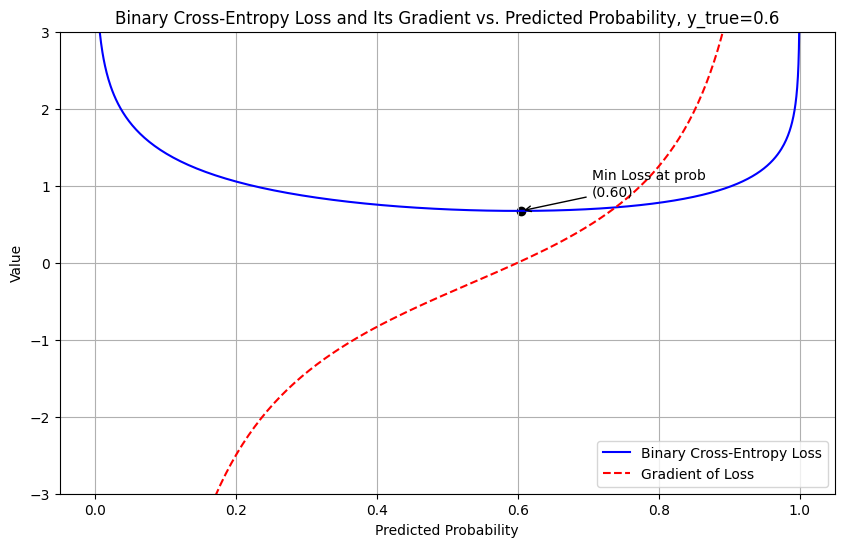

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the binary cross-entropy loss function
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-15  # To avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Define the gradient of the binary cross-entropy loss with respect to y_pred
def bce_gradient(y_true, y_pred):
    epsilon = 1e-15  # To avoid division by zero
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return (y_pred - y_true) / (y_pred * (1 - y_pred))

# Generate a range of logit values
logits = np.linspace(-10, 10, 400)
# Compute the corresponding sigmoid outputs (predicted probabilities)
pred_probs = sigmoid(logits)

# Set the true label
y_true = 0.6

# Compute the loss and gradient for the given true label
loss = binary_cross_entropy(y_true, pred_probs)
gradient = bce_gradient(y_true, pred_probs)

# Plot the loss function and its gradient
plt.figure(figsize=(10, 6))
plt.plot(pred_probs, loss, label='Binary Cross-Entropy Loss', color='blue')
plt.plot(pred_probs, gradient, label='Gradient of Loss', color='red', linestyle='--')
plt.xlabel('Predicted Probability')
plt.ylabel('Value')
plt.title('Binary Cross-Entropy Loss and Its Gradient vs. Predicted Probability, y_true=0.6')
plt.legend()
plt.grid(True)

# Set y-axis limits to [-1, 1]
plt.ylim(-3, 3)

# Annotate the minimum loss point
min_index = np.argmin(loss)
min_pred_prob = pred_probs[min_index]
min_loss = loss[min_index]
plt.scatter(min_pred_prob, min_loss, color='black')
plt.annotate(f'Min Loss at prob \n({min_pred_prob:.2f})',
             xy=(min_pred_prob, min_loss),
             xytext=(min_pred_prob + 0.1, min_loss+0.2),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='left')

plt.show()


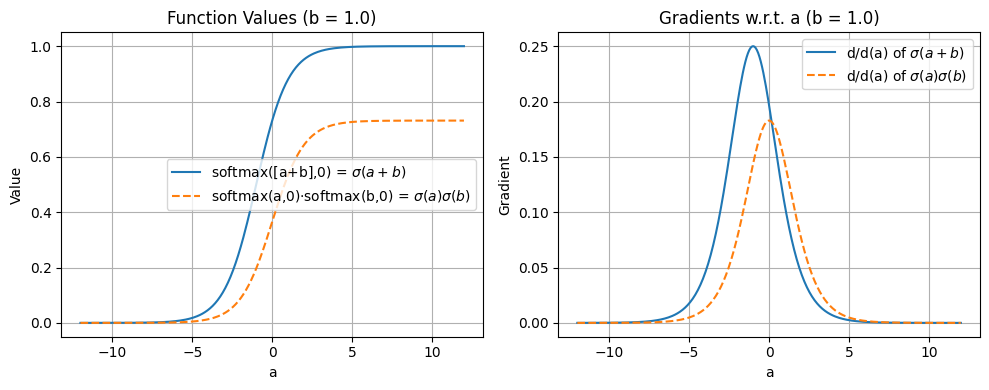

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))


a_vals = np.linspace(-12, 12, 300)
b_vals = np.linspace(-12, 12, 300)

# 1) softmax([a+b], [0]) => sigma(a+b)
soft_sum_vals = sigmoid(a_vals + b_vals)
# Derivative wrt a: sigmoid(...) * (1 - sigmoid(...))
soft_sum_grads = soft_sum_vals * (1 - soft_sum_vals)

# 2) softmax(a, 0)*softmax(b, 0) => sigma(a)*sigma(b)

soft_prod_vals = sigmoid(a_vals) * sigmoid(b_vals)


# Plot
plt.figure(figsize=(10,4))

# -- Plot function values
plt.subplot(1,2,1)
plt.plot(a_vals, soft_sum_vals, label=r"softmax([a+b],0) = $\sigma(a+b)$")
plt.plot(a_vals, soft_prod_vals, label=r"softmax(a,0)·softmax(b,0) = $\sigma(a)\sigma(b)$", linestyle='--')
plt.title(f"Function Values (b = {b_const})")
plt.xlabel("a")
plt.ylabel("Value")
plt.legend()
plt.grid(True)

# -- Plot derivatives wrt a
plt.subplot(1,2,2)
plt.plot(a_vals, soft_sum_grads, label=r"d/d(a) of $\sigma(a+b)$")
plt.plot(a_vals, soft_prod_grads, label=r"d/d(a) of $\sigma(a)\sigma(b)$", linestyle='--')
plt.title(f"Gradients w.r.t. a (b = {b_const})")
plt.xlabel("a")
plt.ylabel("Gradient")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
